# Measure of Central Tendency

1. Mean
2. Median
3. Mode

### Import required libraries and modules

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [2]:
ages = [24, 34, 54, 14, 32, 26, 17, 43, 33, 47, 20, 26, 22, 47, 59, 36, 47]

In [3]:
np.mean(ages)

34.1764705882353

In [4]:
np.median(ages)

33.0

In [5]:
stats.mode(ages)

47

In [6]:
ages = [24, 34, 54, 14, 32, 26, 17, 43, 33, 47, 20, 26, 22, 47, 59, 36, 47, 120]

In [7]:
stats.mean(ages)

38.94444444444444

In [8]:
stats.median(ages)

33.5

Observations,
   - As shown above, if we add one big value to our data then mean is changed significantly but median is not changed that much of it.

In [9]:
stats.mode(ages)

47

   - Mode is more useful when working with categorical features

## Outliers

<Axes: >

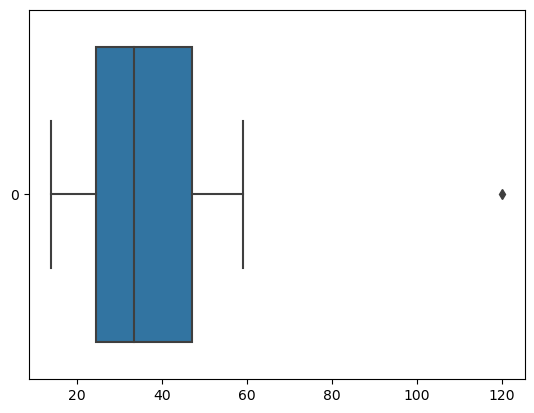

In [10]:
sns.boxplot(ages, orient='h')

## 5 Number Summary

1. Minimum
2. 25 Percentile (Q1)
3. Median
4. 75 Percentile (Q3)
5. Maximum

In [11]:
q1, q3 = np.percentile(ages, [25, 75])

In [12]:
q1, q3

(24.5, 47.0)

In [13]:
# Inter Quartile Range

IQR = q3 - q1

lower_fence = q1 - 1.5 * (IQR)
higher_fence = q3 + 1.5 * (IQR)

lower_fence, higher_fence

(-9.25, 80.75)

# Measure of Dispersion

1. Variance
2. Standard Deviation

In [14]:
# Calculates the sample variance
stats.variance(ages)

578.5261437908497

In [15]:
# Calculates the polpulation variance
np.var(ages)

546.3858024691358

In [16]:
def variance(data, dof=0):
    n = len(data)
    mean = sum(data)/n
    deviation = [(x - mean) ** 2 for x in data]
    variance = sum(deviation)/(n-dof)
    return variance

In [17]:
variance(ages)

546.3858024691358

In [18]:
variance(ages, 1)

578.5261437908497

In [19]:
stats.pvariance(ages) # Population variance

546.3858024691358

In [20]:
math.sqrt(stats.pvariance(ages)) # Standard Deviation

23.37489684403197

## Histograms and PDF

<Axes: ylabel='Count'>

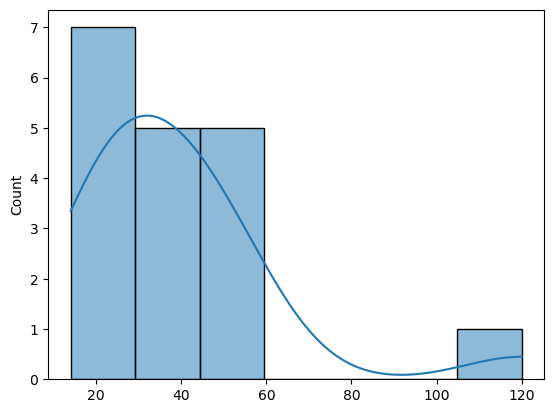

In [21]:
sns.histplot(ages, kde=True)

- kde = True, it creates the smoothen curve which called Probability Density Function

In [22]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

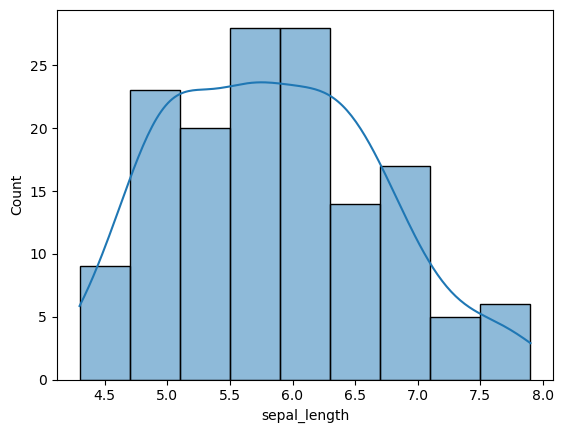

In [23]:
sns.histplot(df['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

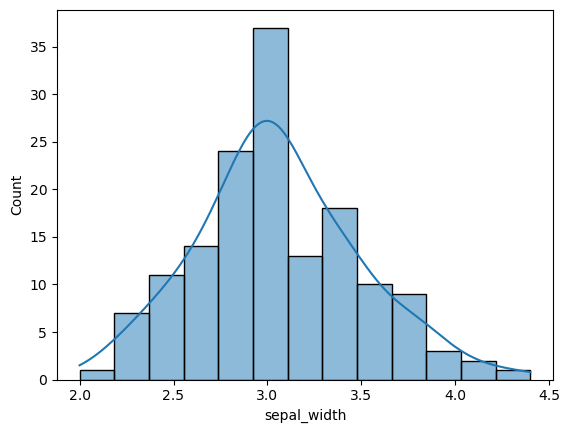

In [24]:
sns.histplot(df['sepal_width'], kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

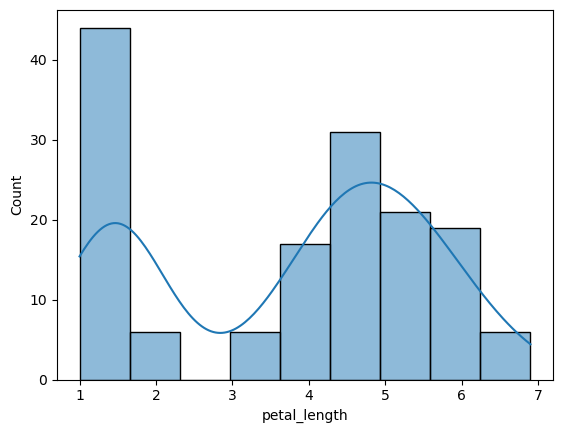

In [25]:
sns.histplot(df['petal_length'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

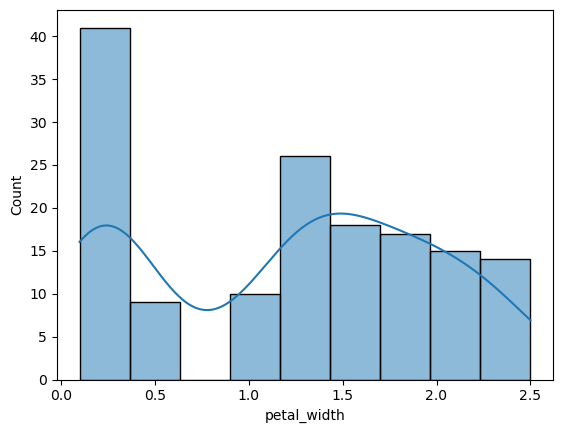

In [26]:
sns.histplot(df['petal_width'], kde=True)

### Create a normal distributed data

In [27]:
s = np.random.normal(0.5, 0.2, 1000)

<Axes: ylabel='Count'>

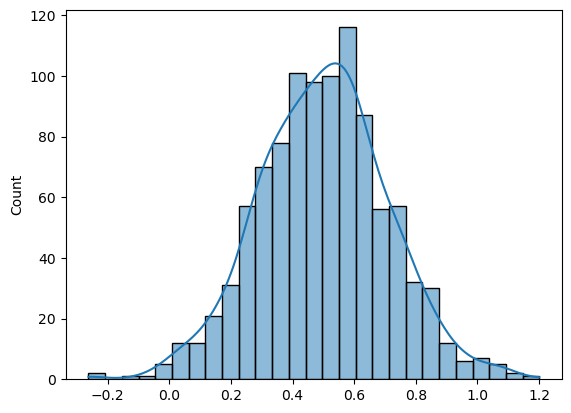

In [28]:
sns.histplot(s, kde=True)

## Log Normal Distribution & Power Law Distribution

In [29]:
mu, sigma = 3., 1.
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

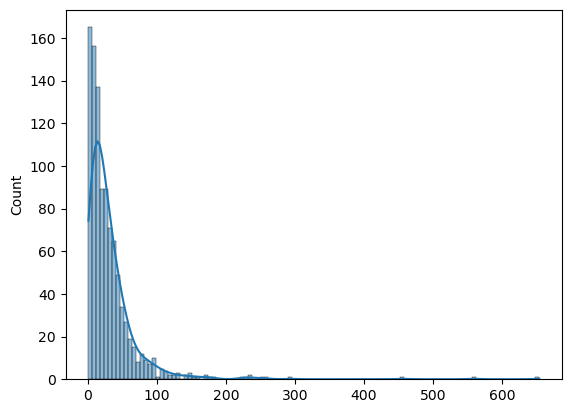

In [30]:
sns.histplot(s, kde=True)

- If we apply log to the distribution then it creates Normal Distribution

<Axes: ylabel='Count'>

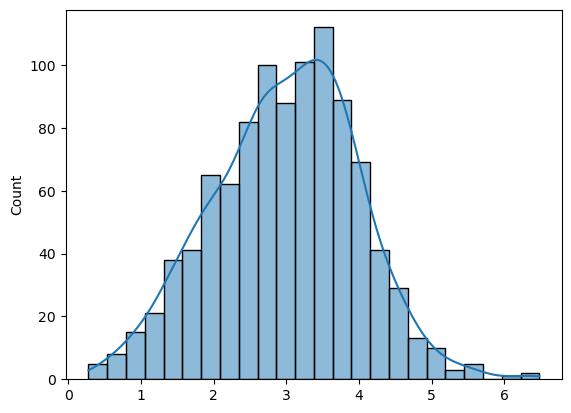

In [31]:
sns.histplot(np.log(s), kde=True)

### Check whether distribution is Normal Distribution or not

In [32]:
# If you want to check whether feature is gaussian or normal distributed otr not
# Q-Q plot

def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample, kde=True)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist='norm', plot=pylab)
    plt.show()

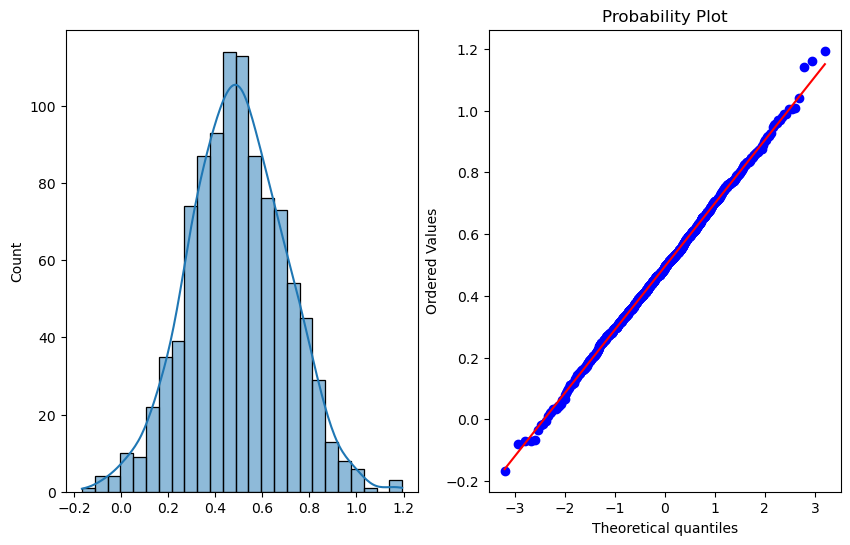

In [33]:
s = np.random.normal(0.5, 0.2, 1000)
plot_data(s)

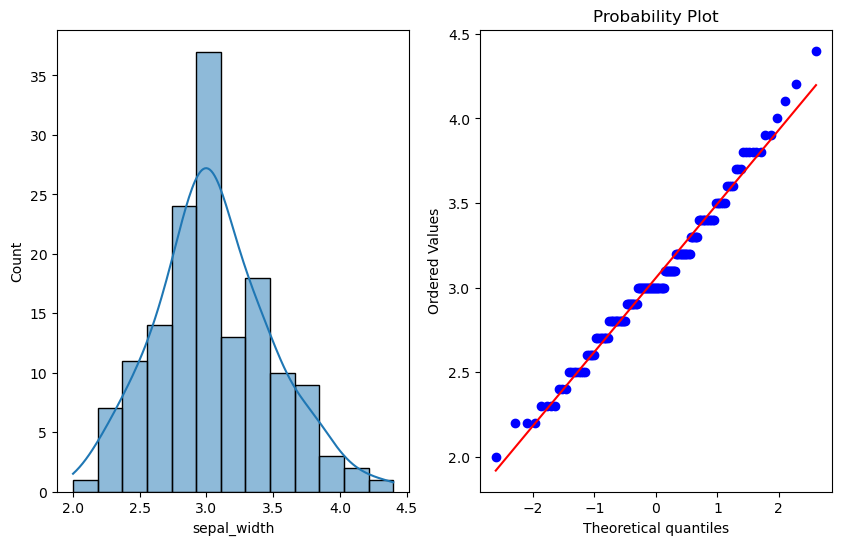

In [34]:
plot_data(df['sepal_width'])

### Check whether distribution is Log Normal Distribution or not

In [35]:
# If you want to check whether feature is log normal distributed otr not
# Q-Q plot

def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample, kde=True)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample), dist='norm', plot=pylab)
    plt.show()

In [36]:
s = np.random.lognormal(3, 1, 1000)

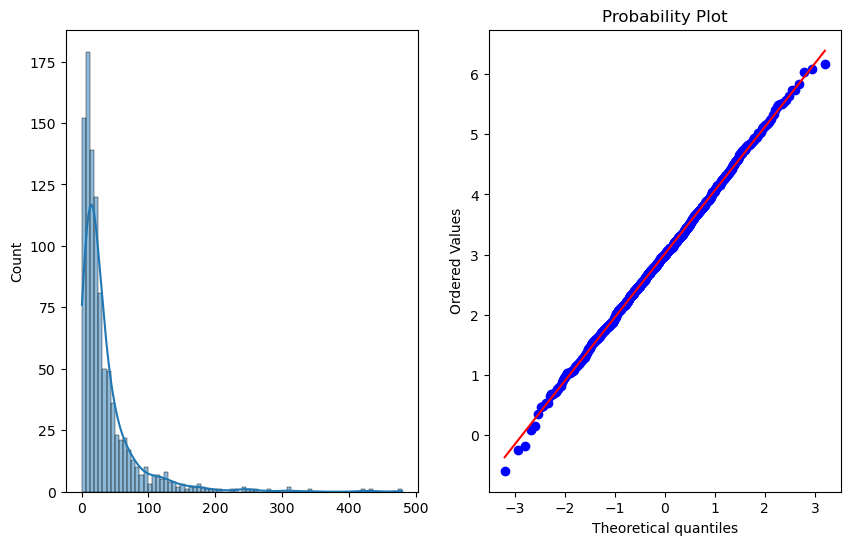

In [37]:
plot_data_log(s)

## Pearson and Spearman Rank Correlation

In [38]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
df.corr() # default correlation is Pearson Correlation

C:\Users\sunil\AppData\Local\Temp\ipykernel_10632\2093493233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # default correlation is Pearson Correlation


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


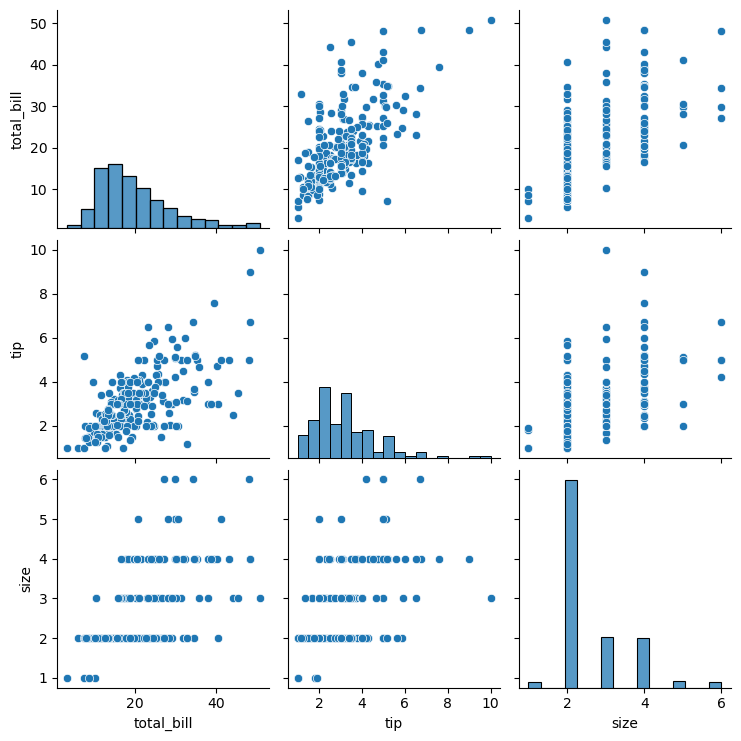

In [40]:
sns.pairplot(df)